## Validate Matlab input file & run before run file `Automatic_subj_training-test_HR.ipynb`. This is used to verify the step segmentation looks properly

In [1]:
fileName="5inputs.mat"

In [3]:
from keras.models import load_model
import scipy.io as sio 
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#from comet_ml import Experiment
seed_value=12321
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

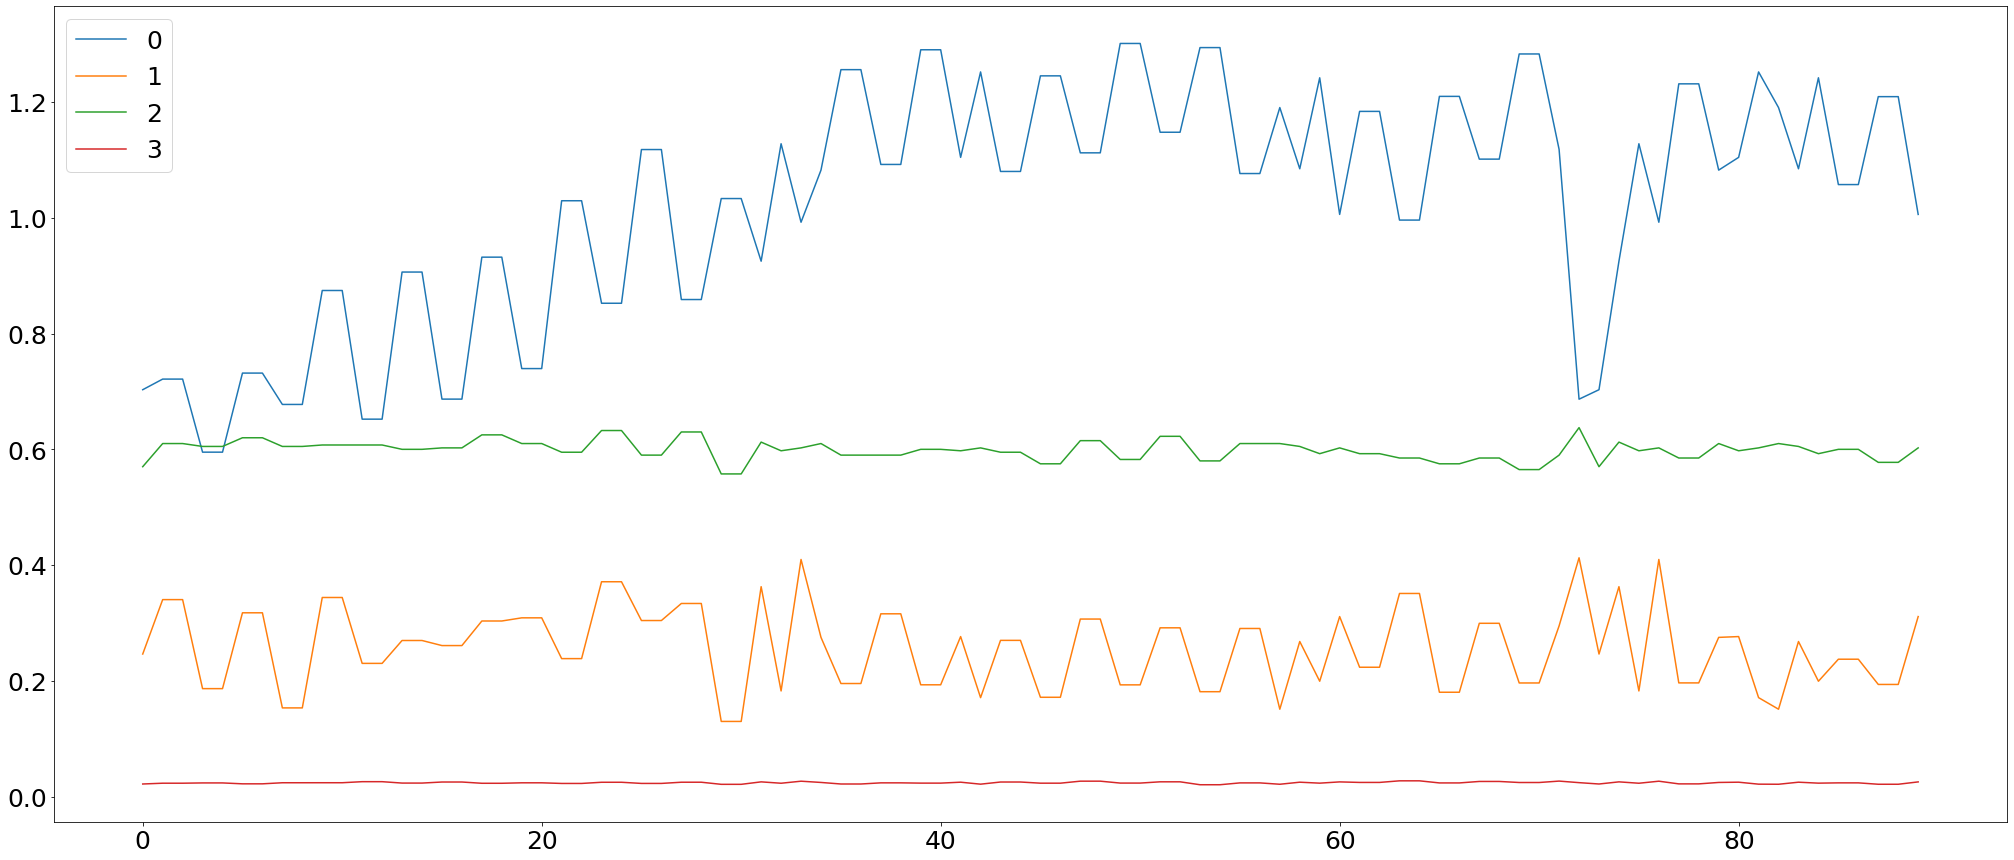

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

i=sio.loadmat(fileName)
 
TTest=i['TTest']
TTrain=i['TTrain']
XTrain=i['XTrain']
XTest=i['XTest']

XTrain=XTrain.reshape(-1)
TTrain=TTrain.reshape(-1)
XTest=XTest.reshape(-1)
TTest=TTest.reshape(-1)

test=np.transpose(XTrain).reshape(-1)
test2=np.transpose(XTest).reshape(-1)
noFeatures = np.shape(test[0])[0]
noTimeSteps = np.shape(test[0])[1]

list_test=[]
for i in range(len(test)):
    temp_trainData=np.transpose(np.array(test[i]))
    list_test.append(temp_trainData)
for j in range(len(test2)):  
    temp_testData=np.transpose(np.array(test2[j]))
    list_test.append(temp_testData)
list_test=np.vstack(list_test)
#print(np.shape(list_test))
#print(list_test)

speed=list_test[:,0]
speedChange=list_test[:,1]
stepDuration=list_test[:,2]
vertOscillation_dist_amp=list_test[:,3]

plt.figure(figsize=(35,15))
print()
for i in range(len(np.transpose(list_test))-1):
    plt.plot(list_test[:,i],label="{}".format(i))

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.legend(prop={'size': 25})
plt.show()